In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Simulación de funciones de transferencia arbitrarias

Hasta el momento, se han realizado cálculos de las respuestas de distintos sistemas de forma analítica usando `Sympy`. Este método puede ser lento o fallar ante funciones de transferencia de orden suerior u otras formas de entrada.  Esta vez se expondrá otra forma para simular los sistemas. 


## Recuperación de ODE para integración

Puede usarse el [método de integración de Euler](https://en.wikipedia.org/wiki/Euler_method) para simular sistemas a partir del modelo temporal.

![bloque](figuras/bloque_tiempo.PNG)


**Ejemplo**

Suponga la siguiente función de transferencia:

$$G = \frac{Y(s)}{X(s)} = \frac{k}{\tau s + 1}$$

El modelo en el dominio del tiempo es:

$$ Y(s) (\tau s + 1) = k X(s) $$

$$ \tau \frac{dy}{dt} + y(t) = k x(t) $$

$$ \frac{dy}{dt} = -\frac{1}{\tau}y(t) + \frac{k}{\tau}x(t)$$

Se definen los parámetros del sistema y la señal de entrada

In [2]:
k = 1
tau = 5
def u(t):
    if t<1:
        return 0
    else:
        return 1

Se define un vector de tiempo para simular y se inicializan las variables del sistema

In [3]:
ts = np.linspace(0, 20, 1000)
dt = ts[1] # intervalo entre elementos de ts
y = 0
ys = []

Se aproxima el comportamiento de `y` iterando sobre `ts`

In [4]:
for t in ts:
    dydt = -1/tau*y + 1/tau*u(t)
    
    y += dydt*dt
    ys.append(y)

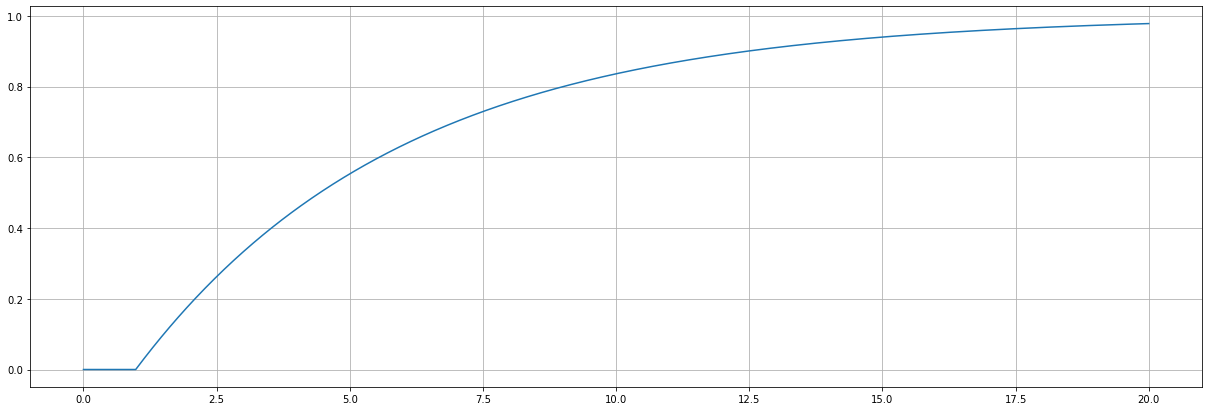

In [5]:
plt.figure(figsize=(21, 7))
plt.plot(ts, ys)
plt.grid(True)

## Usando `scipy.signal`

El módulo `scipy.signal` incluye diversas funciones para trabajar con sistemas LTI.

In [6]:
import scipy.signal

En este módulo, se define la función de transferencia de un sistema a partir de los coeficientes del numerador y el denominador.

In [7]:
k = 1
tau = 5

num = k
den = [tau, 1]

G = scipy.signal.lti(num, den)
G

TransferFunctionContinuous(
array([0.2]),
array([1. , 0.2]),
dt: None
)

A partir del objeto creado, se puede encontrar la respuesta al escalón

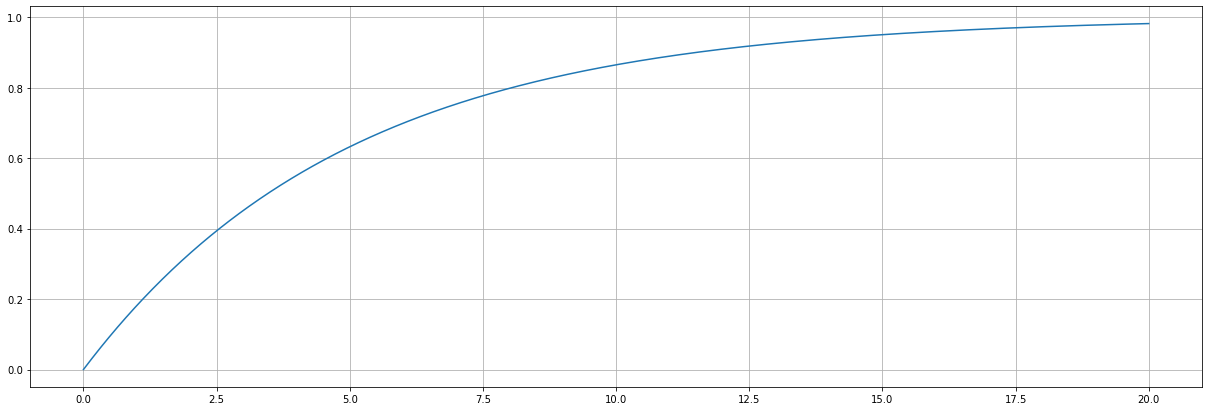

In [8]:
ts = np.linspace(0, 20, 1000)
_, ys_step = G.step(T=ts)
plt.figure(figsize=(21, 7))
plt.plot(ts, ys_step)
plt.grid(True)

También puede hallarse la respuesta del sistema ante entradas arbitrarias

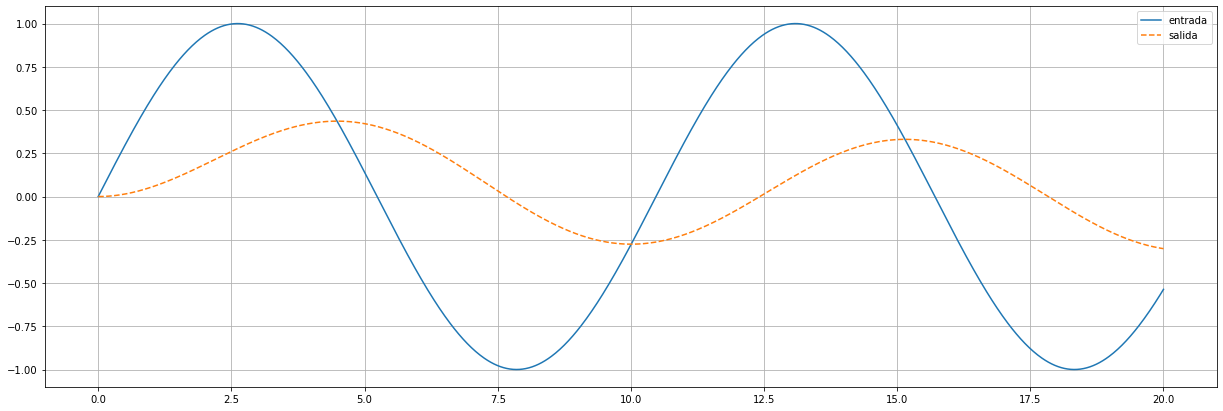

In [9]:
x_sin = np.sin(.6*ts)

_, ys_lsim, _ = scipy.signal.lsim(G, U=x_sin, T=ts)
plt.figure(figsize=(21, 7))
plt.plot(ts, x_sin)
plt.plot(ts, ys_lsim, '--');
plt.legend(['entrada', 'salida'])
plt.grid(True)

## Usando `control`

Ya se ha mostrado que la interconexión de diversos sistemas LTI requiere que sus modelos frecuenciales sean operados con operaciones aritméticas. Los modelos de `scipy.signal` no permiten estas operaciones. Para tal fin puede usarse el módulo `control`.

In [10]:
G1 = scipy.signal.lti(2, [1,0])
G2 = scipy.signal.lti(10, [1, 1.5, 1, 1])
G3 = G1+G2

TypeError: unsupported operand type(s) for +: 'TransferFunctionContinuous' and 'TransferFunctionContinuous'

In [11]:
#!pip install control
import control

In [12]:
G1 = control.tf(2, [1,0])
G2 = control.tf(10, [1, 1.5, 1, 1])
G3 = G1+G2

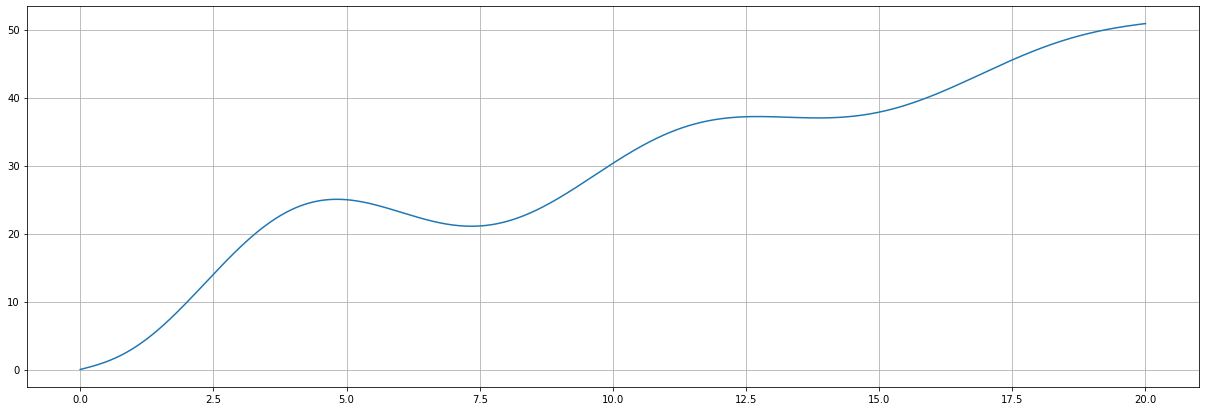

In [13]:
_, y = control.step_response(G3, ts)
plt.figure(figsize=(21, 7))
plt.plot(ts, y)
plt.grid(True)

Observe que la commbinación de modelos de orden 1 y 2 permite obtener el comportamiento de sistemas de orden 3 en adelante.

In [14]:
G2

TransferFunction(array([10]), array([1. , 1.5, 1. , 1. ]))

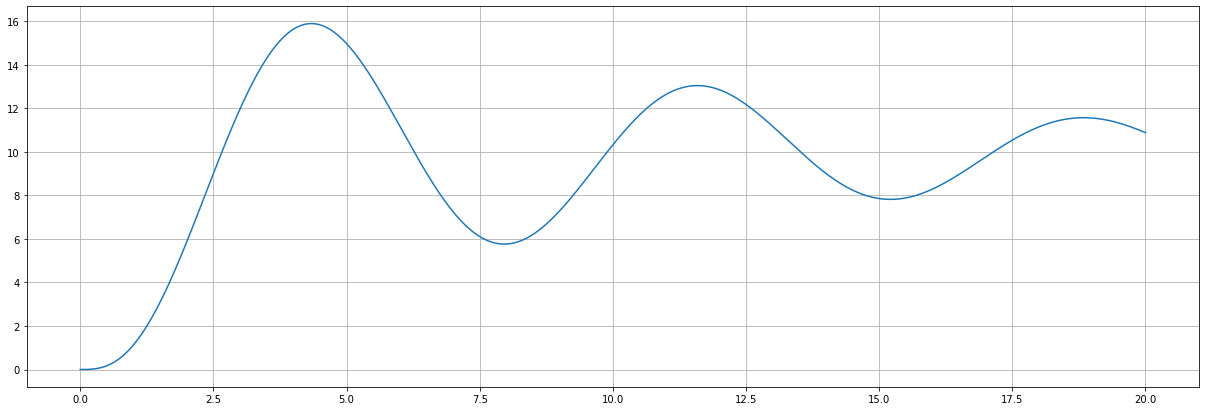

In [15]:
_, y = control.step_response(G2, ts)
plt.figure(figsize=(21, 7))
plt.plot(ts, y)
plt.grid(True)


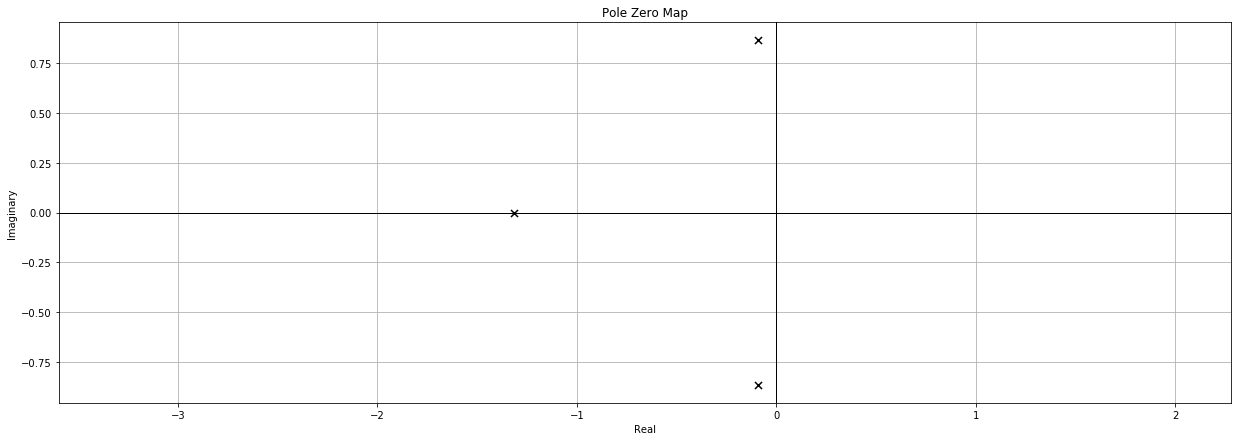

In [16]:
plt.figure(figsize=(21, 7))
control.pzmap(G2)
plt.grid(True)